In [44]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from random import random

%matplotlib notebook

In [49]:
######## CONFIG ########
input_file = "input.txt"     # Location of input file (required)
output_file = "out.txt"           # Location of output file or None
########################

In [50]:
# Stolen from solver.py
def read_input(file_name):
    f = open(file_name, "r")
    n = int(f.readline())
    k = int(f.readline())

    points = []
    for line in f:
        points.append(tuple([int(v) for v in line.split()]))

    f.close()

    return n, k, points

In [51]:
def read_output(file_name):
    f = open(file_name, "r")
    max_distance = int(f.readline())
    
    i = 0
    cluster_ind_dict = defaultdict(list)
    for line in f.readlines():
        cluster_ind_dict[i] = [int(ind) - 1 for ind in line.split(" ")]
        i += 1
    return max_distance, cluster_ind_dict

<IPython.core.display.Javascript object>


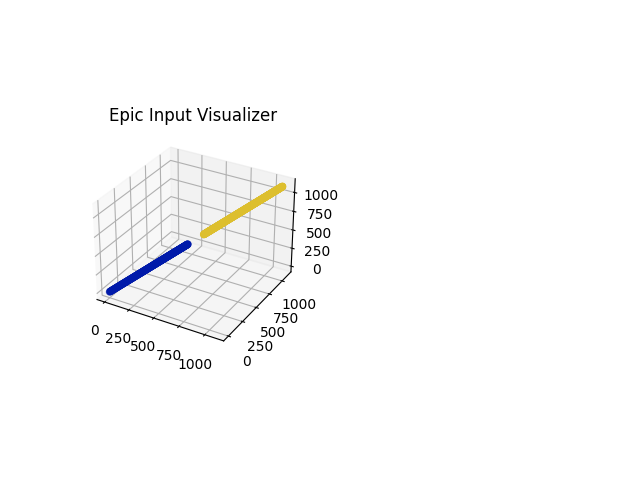

In [52]:
n, k, points = read_input(input_file)
x = [point[0] for point in points]
y = [point[1] for point in points]
z = [point[2] for point in points]

if output_file is None:
    colors = ['blue' for _ in range(n)]
else:
    colors = [None] * n
    for cluster, inds in read_output(output_file)[1].items():
        color = (random(), random(), random())
        for ind in inds:
            colors[ind] = color
    
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title("Epic Input Visualizer")
scatter_1 = ax.scatter(x, y, z, color=colors)
plt.show()